In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import tensorflow as tf


A group of pre‐dictors is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

shape : (10000, 28, 28)


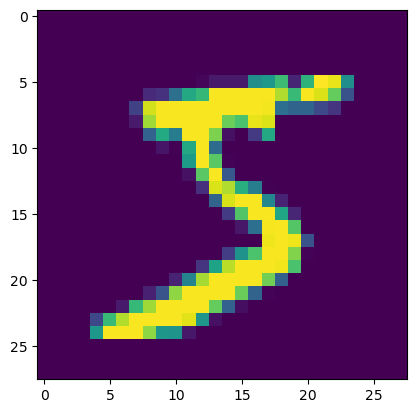

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0



number=0
print('shape :',x_test.shape)
plt.imshow(x_train[number])

In [3]:
#Voting Classiers
import numpy as np

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf.fit(x_train, y_train)


c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [14]:
from sklearn.metrics import accuracy_score



for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(x_train, y_train)
    y_pre=cls.predict(x_test)

    print(clf.__class__.__name__, accuracy_score(y_test, y_pre))




c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9258
RandomForestClassifier 0.9258
SVC 0.9258


c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.9258


Bagging and Pasting



 When
sampling is performed with replacement, this method is called bagging1
(short for
bootstrap aggregating2
). When sampling is performed without , it is called
pasting.
3

predictors can all be trained in parallel, via different
CPU cores or even different servers. Similarly, predictions can be made in parallel.
This is one of the reasons why bagging and pasting are such popular methods: they
scale very well

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_cls=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True
    ,n_jobs=-1,

)

bag_cls.fit(x_train,y_train)
bag_cls.predict(x_test)

array([7, 6, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
bag_cls.score(x_test,y_test)

0.8465

predictors can all be trained in parallel, via different
CPU cores or even different servers. Similarly, predictions can be made in parallel.
This is one of the reasons why bagging and pasting are such popular methods: they
scale very well




Bootstrapping introduces a bit more diversity in the subsets that each predictor is
trained on, so bagging ends up with a slightly higher bias than pasting, but this also
means that predictors end up being less correlated so the ensemble’s variance is
reduced

Overall, bagging often results in better models, which explains why it is gen‐
erally preferred

BaggingClassifier is
roughly equivalent to the previous RandomForestClassifier

Boosting



Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to train predictors sequentially, each trying to correct its prede‐
cessor. 

AdaBoost


One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predic‐
tors focusing more and more on the hard cases. This is the technique used by Ada‐
Boost.



to build an AdaBoost classifier, a first base classifier (such as a Decision
Tree) is trained and used to make predictions on the training set. The relative weight
of misclassified training instances is then increased. A second classifier is trained
using the updated weights and again it makes predictions on the training set, weights
are updated, and so on

There is one important drawback to this sequential learning techni‐
que: it cannot be parallelized (or only partially), since each predic‐
tor can only be trained after the previous predictor has been
trained and evaluated. As a result, it does not scale as well as bag‐
ging or pasting.

If your AdaBoost ensemble is overfitting the training set, you can
try reducing the number of estimators or more strongly regulariz‐
ing the base estimator

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [21]:
ada_clf.score(x_test,y_test)

0.7785

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

score=[]

for  i in range(1,16):
    gbrt = GradientBoostingRegressor(max_depth=i, n_estimators=3*i, learning_rate=1.0)
    gbrt.fit(x_train,y_train)
    score.append(gbrt.score(x_test,y_test))






KeyboardInterrupt: 

In [ ]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],score)

0.4813403956193085

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
for y_pred in gbrt.staged_predict(X_val)]


bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

In [ ]:
import xgboost


xgb_reg = xgboost.XGBRegressor()

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

#XGBoost also offers several nice features, such as automatically taking care of early



xgb_reg.fit(X_train, y_train,
 eval_set=[(X_val, y_val)], early_stopping_rounds=2)
 
y_pred = xgb_reg.predict(X_val)
